In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dataset = pd.read_csv('mahasiswa.csv', delimiter=',')
dataset

,No,Nama,Semester,Penghasilan,IPK,keterangan
0,1,Lilis,2,2500,3.55,1
1,2,Yeni,4,2600,2.92,0
2,3,Putri,4,2700,3.40,0
3,4,Putra,2,2800,2.95,0
4,5,Roni,4,2900,3.20,1


In [2]:
from sklearn.model_selection import train_test_split
X = dataset.drop(columns = "keterangan")
y = dataset.keterangan

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4, 5), (1, 5), (4,), (1,))

In [3]:
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['No', 'Semester', 'Penghasilan','IPK']),
    ('categoric', cat_pipe(encoder = 'onehot'), ['Nama']),
])

In [4]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier(n_neighbors=3, p=2, metric = 'euclidean')),
])

In [5]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['No', 'Semester',
                                                   'Penghasilan', 'IPK']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Nama'])])),
                ('algo',
                 KNeighborsClassifier(metric='euclidean', n_ne

In [6]:
y_pred = pipeline.predict(X_test)
y_pred

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0], dtype=int64)

In [7]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Akurasi: {:.2f}%".format(accuracy))

Akurasi: 100.00%


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

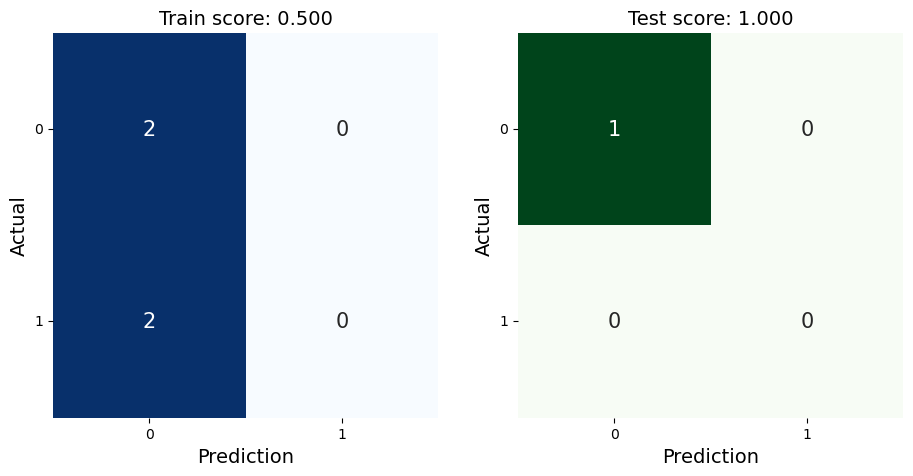

In [8]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)